Dataset from Canvas (`Titanic_Passengers.csv`)

In [27]:
import pandas as pd
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable?
	- 
- What kind of data is the `gender` (indep. variable)
	- Nominal

Two types:
- `Ordinal` data. Data tjat can be ordered
- `Categorical/nominal`. Data that cannot be ordered

In [28]:
# Margins = True will show the summary 
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'])
print(contingency_table)

Lived_Died  died  lived
Gender                 
Female       143    339
Male         709    161


<Axes: xlabel='Gender'>

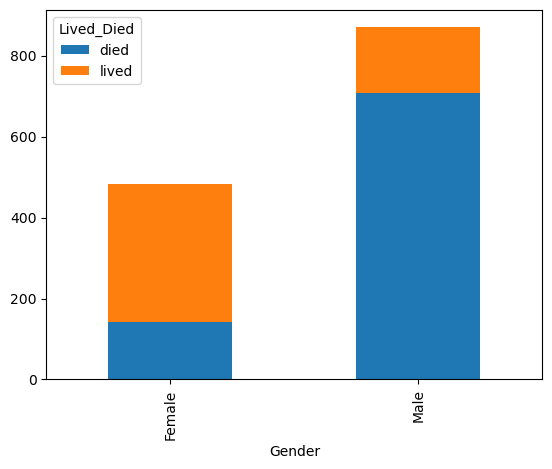

In [29]:
# Task: Create a stacked bar chart showing the number of passenger by gender that lived or died
import matplotlib.pyplot as plt
import seaborn as sns
contingency_table.plot(kind='bar', stacked=True)

                       

In [30]:
from scipy import stats # for chi2_contingency
print(stats.chi2_contingency(contingency_table.iloc[0:3]))

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statstics, the less likelihood that observed values were the result of pure chance
# 2) Target P-value (0.05): If the p-value is less than 0.05, then we can reject the null hypothesis that the variables are independent.
# 3) Degrees of freedom: 1 degree of freedom. (2 rows -1) * (2 columns -1) = 1

Chi2ContingencyResult(statistic=355.24355436145913, pvalue=3.0570688722545846e-79, dof=1, expected_freq=array([[303.74556213, 178.25443787],
       [548.25443787, 321.74556213]]))


## Chi-Square Example: Was Age relevant?

In [31]:
# first check the age column it is already fixed to be the age at the time of the accident
passengers_df.head()
# what about null values?

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


Lived_Died  died  lived
Age_Group              
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats: Chi2ContingencyResult(statistic=24.465546982751874, pvalue=0.0009433264132943263, dof=7, expected_freq=array([[ 62.4246988 ,  37.5753012 ],
       [141.70406627,  85.29593373],
       [282.15963855, 169.84036145],
       [165.42545181,  99.57454819],
       [109.24322289,  65.75677711],
       [ 43.69728916,  26.30271084],
       [ 21.22439759,  12.77560241],
       [  3.12123494,   1.87876506]]))


<Axes: xlabel='Age_Group'>

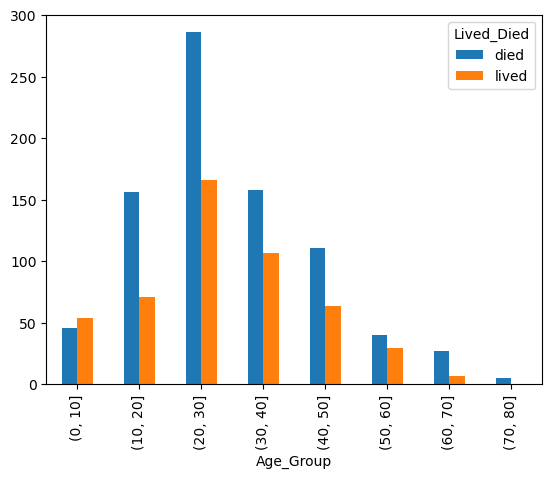

In [32]:
# Create bins for age 0-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80
passengers_df['Age_Group'] = pd.cut(passengers_df['Age'], range(0, 81, 10))
contingency_table = pd.crosstab(passengers_df['Age_Group'], passengers_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats: {stats.chi2_contingency(contingency_table)}')
# Plot it 
contingency_table.plot(kind='bar')


In [33]:
# Create a heat map 
passengers_df['Age_Group'] = pd.cut(passengers_df['Age'], range(0, 81, 10))
# Use a pivot table

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
# load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.columns


Index(['Name', 'Born', 'Died', 'Age', 'Gender', 'Passenger_Class',
       'Lived_Died', 'Fare', 'Fare_decimal'],
      dtype='object')

C:\Users\18019\AppData\Local\Temp\ipykernel_13272\3010212447.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups']) # use a pivot table
C:\Users\18019\AppData\Local\Temp\ipykernel_13272\3010212447.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 'Lived' if x == 1 else 'Died') # map the values to Lived or Died


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-69'),
  Text(7.5, 0, '70-79')])

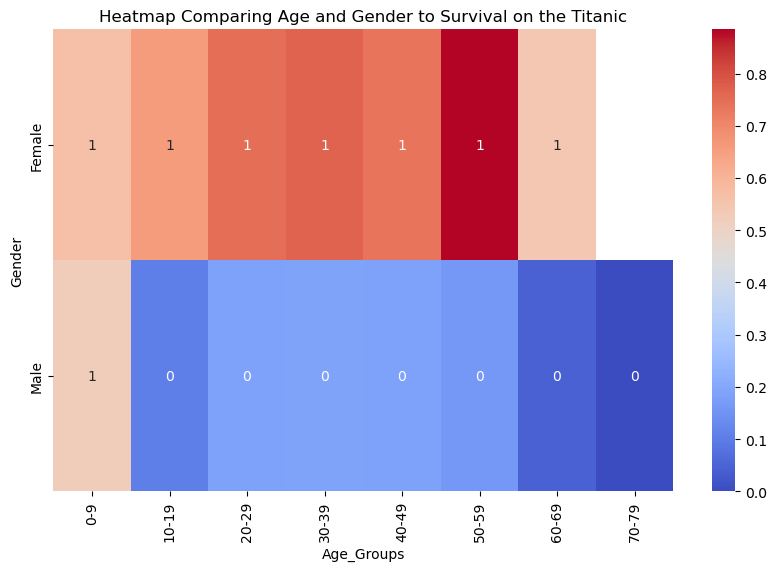

In [35]:
# Drop the columns that are not needed
passengers_df = passengers_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1)
passengers_df.dropna(inplace=True) # drop rows with missing values
# Encode the categorical columns
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Groups'] = pd.cut(passengers_df['Age'], bins=range(0, 90, 10)) # create age bins
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups']) # use a pivot table
pivot_table.applymap(lambda x: 'Lived' if x == 1 else 'Died') # map the values to Lived or Died
# create a heatmap
plt.figure(figsize=(10, 6))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True,yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

## TASK: Did the Titanic Passenger Class Affect Suvivorship?

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')# load data
passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


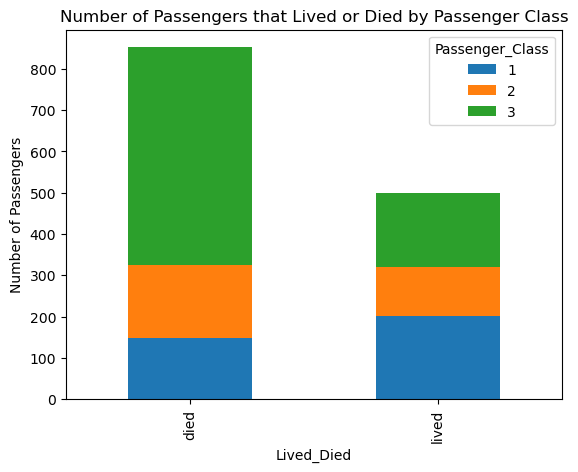

In [37]:
# create a stack plot to compare the passenger class to the number of passengers that lived or died
contingency_table = pd.crosstab( passengers_df['Lived_Died'], passengers_df['Passenger_Class'],margins=False)
contingency_table.plot(kind='bar', stacked=True)
plt.title('Number of Passengers that Lived or Died by Passenger Class')
plt.ylabel('Number of Passengers')
plt.xlabel('Lived_Died')
plt.show()



In [38]:
# run a chi2_contingency on the table
contingency_table = pd.crosstab( passengers_df['Passenger_Class'],passengers_df['Lived_Died'], margins=False)
stats.chi2_contingency(contingency_table)[0:3]

(104.05195288933228, 2.543346399916496e-23, 2)

Which passenger class is responsible for the significant difference in survial rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this is our first test, it is consider a `Priori Test`
- To contuinue our analysis, we will run another test, `Post Hoc` Test


### Post-Hoc Test (Fisher's Exact Test)

- Compare every passenger class to every other class to see if there is statistical signifiacnce vetween the two.
- We could apply a `Chi-Square` for each of the three separate comparison, but our sample data is too small.
- In this case, `Fisher's Exact` test is a better option


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')# load data
contingency_table = pd.crosstab( passengers_df['Passenger_Class'],passengers_df['Lived_Died'], margins=False)
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [40]:
first_class = contingency_table.iloc[0].values # extract the first row
second_class = contingency_table.iloc[1].values # extract the second row
third_class = contingency_table.iloc[2].values # extract the third row
# create a Fisher's Exact test
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([first_class, second_class]) # compare first and second class
print(f'First vs Second Class: {pvalue}')
oddsratio, pvalue = fisher_exact([first_class, third_class]) # compare first and third class
print(f'First vs Third Class: {pvalue}')
oddsratio, pvalue = fisher_exact([second_class, third_class]) # compare second and third class
print(f'Second vs Third Class: {pvalue}')


First vs Second Class: 1.827149276703859e-05
First vs Third Class: 7.457205699022123e-24
Second vs Third Class: 5.007621820657881e-06


Each of the Fisher's test revea;s statistical

Another way to conceptualize the result is to look at percentages:

| Passenger Class   |   Died    |
|-------------------|-----------|
| First Class       |   43%    |
| Second Class      |   60%    |
| Third Class       |   74%    |

TODO: Create a heatmap of Passenger Class split in Age_Ranges by Gender and survival rate




C:\Users\18019\AppData\Local\Temp\ipykernel_13272\1342154441.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 'Lived' if x == 1 else 'Died') # map the values to Lived or Died


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'PC 1: 0-9'),
  Text(1.5, 0, 'PC 1: 10-19'),
  Text(2.5, 0, 'PC 1: 20-29'),
  Text(3.5, 0, 'PC 1: 30-39'),
  Text(4.5, 0, 'PC 1: 40-49'),
  Text(5.5, 0, 'PC 1: 50-59'),
  Text(6.5, 0, 'PC 1: 60-69'),
  Text(7.5, 0, 'PC 1: 70-79'),
  Text(8.5, 0, 'PC 2: 0-9'),
  Text(9.5, 0, 'PC 2: 10-19'),
  Text(10.5, 0, 'PC 2: 20-29'),
  Text(11.5, 0, 'PC 2: 30-39'),
  Text(12.5, 0, 'PC 2: 40-49'),
  Text(13.5, 0, 'PC 2: 50-59'),
  Text(14.5, 0, 'PC 2: 60-69'),
  Text(15.5, 0, 'PC 2: 70-79'),
  Text(16.5, 0, 'PC 3: 0-9'),
  Text(17.5, 0, 'PC 3: 10-19'),
  Text(18.5, 0, 'PC 3: 20-29'),
  Text(19.5, 0, 'PC 3: 30-39'),
  Text(20.5, 0, 'PC 3: 40-49'),
  Text(21.5, 0, 'PC 3: 50-59'),
  Text(22.5, 0, 'PC 3: 60-69'),
  Text(23.5, 0, 'PC 3: 70-79')])

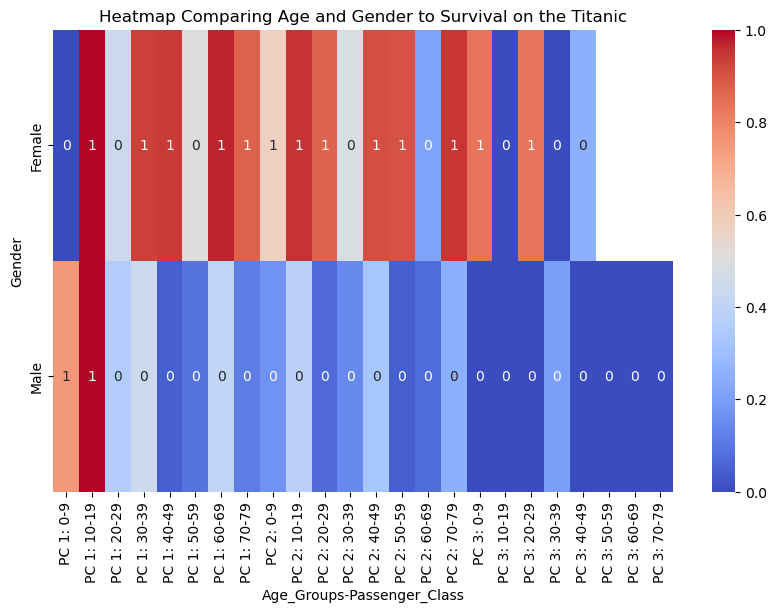

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')# load data

# Drop the columns that are not needed
passengers_df = passengers_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal'], axis=1)
passengers_df.dropna(inplace=True) # drop rows with missing values
# Encode the categorical columns
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] = le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Groups-Passenger_Class'] = pd.cut(passengers_df['Age'], bins=range(0, 90, 10)).astype(str) + '-PC ' + passengers_df['Passenger_Class'].astype(str)
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups-Passenger_Class']) # use a pivot table
pivot_table.applymap(lambda x: 'Lived' if x == 1 else 'Died') # map the values to Lived or Died
# create a heatmap
plt.figure(figsize=(10, 6))
x_axis_labels = [
	'PC 1: 0-9', 'PC 1: 10-19', 'PC 1: 20-29', 'PC 1: 30-39', 'PC 1: 40-49', 'PC 1: 50-59', 'PC 1: 60-69', 'PC 1: 70-79',
	'PC 2: 0-9', 'PC 2: 10-19', 'PC 2: 20-29', 'PC 2: 30-39', 'PC 2: 40-49', 'PC 2: 50-59', 'PC 2: 60-69', 'PC 2: 70-79',
	'PC 3: 0-9', 'PC 3: 10-19', 'PC 3: 20-29', 'PC 3: 30-39', 'PC 3: 40-49', 'PC 3: 50-59', 'PC 3: 60-69', 'PC 3: 70-79'
]
sns.heatmap(pivot_table, annot=True,yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

### T-Test: Tare 

While `Chi-Test` and `Fisher-test`

### How was Fare(price of passage Affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passanger classes?
- Is there an interaction between gender and passenger class on the resulting fare

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')# load data


Text(0.5, 1.0, 'Fare Amount based off gender')

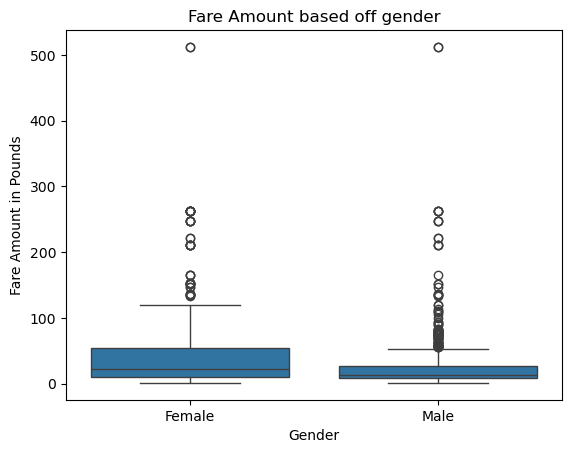

In [43]:
# Visualize the data using boxplots
sns.boxplot(x='Gender', y='Fare_decimal', data=passengers_df)
plt.ylabel('Fare Amount in Pounds') 
plt.title('Fare Amount based off gender')


In [44]:
male = passengers_df[passengers_df['Gender'] == 'Male'] 
print(f'Male Summary\n{male["Fare_decimal"].describe()}')

Male Summary
count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [45]:
female = passengers_df[passengers_df['Gender'] == 'Female']
print(f'Female Summary\n{female['Fare_decimal'].describe()}')

Female Summary
count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


In [47]:
from scipy.stats import ttest_ind
# drop null values
passengers_df.dropna(inplace=True)
male = passengers_df[passengers_df['Gender'] == 'Male'] 
female = passengers_df[passengers_df['Gender'] == 'Female'] 
# run test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare Paid p-value: {pvalue}')

T-Test for Fare Paid p-value: 6.093364811911871e-13


## ANOVA Example: Price Difference Between passenger class 
- `T-Test` specializes in comparing `two` populations
- `ANOVA (Analysis of Variance)` test will allow you to compare the influence of `three or more` populations

Fair prices are `contuinuous numerical depedent variable`. They are affected by the three passenger classes.

Install new package `statsmodels`
```bash
conda install statsmodels
```

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.head() # Make sure the data is loaded

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [59]:
# Load your OLS (Ordinary Least Squares) model
model = ols('Fare_decimal ~ C(Passenger_Class)', data=passengers_df).fit()
# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=1) # typ = # is the anova table format
anova_table 

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(>F)` is the `p-value`

#### ANOVA Notation (R-style Formulas):
- The `~` char separates the left side from the right side
- The `+` char adds a new separated column to the design matrix
- The `:` char adds a new interaction column to the model matrix
- The `*` char signifies the both individual cloumns are combined

The string: `Fare_decimal ~ C(Passenger_Class)` translates to:
- Fare decimal variable is affected by the categroical varuavle (`C`)Passenger Class

Conclusion, there is some difference in price relative to the passenger class.

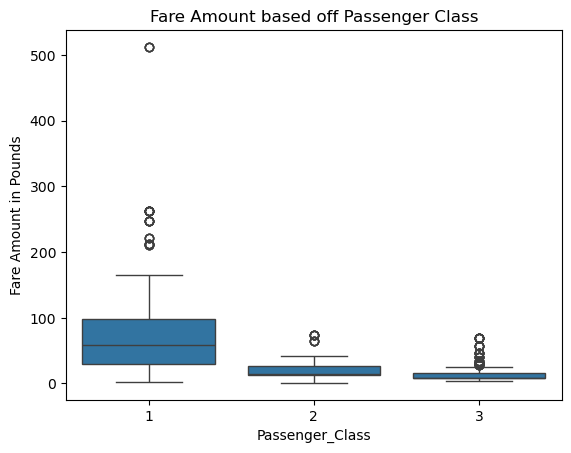

In [61]:
# Create a boxplot of the fare paid by passenger class
sns.boxplot(x='Passenger_Class', y='Fare_decimal', data=passengers_df)
plt.ylabel('Fare Amount in Pounds')
plt.title('Fare Amount based off Passenger Class')
plt.show()

Do a `post-hoc` test on this. For ANOVA we use the `Tukey HSD` test to compare each individual population from a statistically significant ANOVA

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
# passengers_df.head() # Make sure the data is loaded
# Drop unused columns
passengers_df.drop(['Name', 'Born', 'Died', 'Gender', 'Fare', 'Lived_Died'], axis=1, inplace=True)
passengers_df.dropna(inplace=True) # drop rows with missing values

In [73]:
mc_Hammer = MultiComparison(passengers_df['Fare_decimal'], passengers_df['Passenger_Class'])
result = mc_Hammer.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statistical significance is found, then the `rejected` column will indicate `False`, that is, the `null-hypothesis` cannot be rejected.